## Fetching documents throw a socket

To ground the concepts covered in the previous point about the basics of the REST solution we are going to move on to the code, specifically, we are going to develop a solution to retrieve a file from a remote server through the use of python.

This solution will connect to a web page to retrieve its `HTML` document.

This will be achieved in the following way:
1. The script will have an `input()` for the user to provide the web address
2. A new `socket` will be created to handle a _connection-orientation_ based on `TCP`
3. A request will be made to ask the server for the document.
4. Monitor the response sent from the server
5. Terminate the `socket`
6. The whole document is displayed on the screen

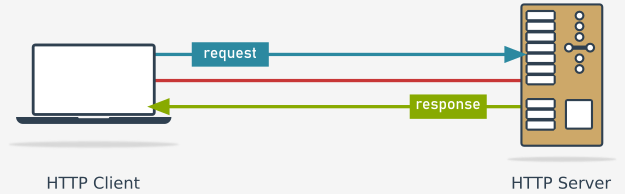

---


## Creating the socket

To generate the socket we are going to rely on a python build-in library called __socket__.

This module contains all the functionality needed to generate sockets, however, we will only focus on the ones used to make a TCP/IP connection in order to generate a connection via REST.

Socket has a main class called Socket which encapsulates all the basic actions related to the behaviour of a socket. This means that the first step to generate a socket would be to instantiate this class.


In [1]:
import socket

obj_socket = socket.socket(socket.AF_INET, socket.SOCK_STREAM)

The arguments received by the socket object may be familiar from [previous section](./1-Basic-Concepts.ipynb).

Let's go in detail:
- __First argument__: Receives the socket domain, which could be internal (`UNIX`) or external (`INET`).
- __Second argument__: Indicates which device will be used to transfer the information (byte by byte).

---

## Setting a connection

Now we would have a socket on the client side, however, the client must connect somewhere in order to request the HTML document.

> __MATIZ__: Server-side sockets are more complex as they must be able to respond to multiple requests from different clients.

In order for our socket to initialise a connection against the server we will use the `connect()` method, which tries to establish a connection against another socket, so (and for our particular case of connection over an INET domain) we will need the IP address and the port.

We will therefore include the following to our socket:

In [2]:
import socket

webpage, port = "www.pythoninstitute.org", 80  # 80 it's a service number to connect into a web
obj_socket = socket.socket(socket.AF_INET, socket.SOCK_STREAM) 
obj_socket.connect((webpage, port))  # Yes its a tuple

> __NOTE__: The connection against a remote socket can go wrong for different reasons (no connection, the server has a problem, etc ...) so, let's assume that the code works and does not raise any exception (yes, even if it does).

Although ... now our socket has a connection against a remote server and now ... what should it do to be able to request the document ? Well ... talk to it in `HTTP`.

---

## HTTP protocol

The HTTP protocol is based on requests sent by a client and responses generated from a server. This protocol defines different methods (or HTTP words) for requesting information from a server.

Some of these methods are:
- __GET__: Get Data
- __DELETE__: Delete data
- __POST__: Publish Data

> __NOTES__: All the existing methods can be consulted in [next section](https://developer.mozilla.org/es/docs/Web/HTTP/Methods).

---



## GET method

The method for asking to the server to send a particular document of a given name is called `GET`.

The code to request this kind of data has the following `HTTP` format:
```HTTP
GET / HTTP/1.1\r\n
Host: www.site.com\r\n
Connection: close\r\n
\r\n
```

Based on this code we can state the following for each line:
1. The executed method and the resource to be accessed are requested
    - `GET / HTTP/1.1\r\n`
2. The host to be accessed (UNIX domain) is indicated
    - `Host: www.site.com\r\n`
3. The server is instructed to cut the connection to our socket at the end of the transfer
    - `Connection: close\r\n`
4. The closing of the session is requested with a line break
    - `\r\n`

Knowing this method we can now tell our socket to send a GET request to the server, this request can be initialised using the socket's `send()` method.

> __NOTE__: This method accepts bytes as arguments, so the HTTP code will be passed to it as bytes.


In [1]:
import socket

webpage, port = "www.pythoninstitute.org", 80

# Sets the connection with the socket
obj_socket = socket.socket(socket.AF_INET, socket.SOCK_STREAM) 
obj_socket.connect((webpage, port))

# Retrieves data from the server
obj_socket.send(
    b"GET / HTTP/1.1\r\nHost: " +
    bytes(webpage, "utf8") +
    b"\r\nConnection: close\r\n\r\n")

68

---

## Waiting for the server response

Once our socket (CLIENT) has sent the request to the remote socket (SERVER), we only have to wait for the remote socket to receive all the response from the server. To do this we can use the `recv()` method of socket indicating as argument the maximum allowed size that can wait for the server's response.

This implies the following change in our socket:

In [2]:
import socket

webpage, port = "www.pythoninstitute.org", 80

# Sets the connection with the socket
obj_socket = socket.socket(socket.AF_INET, socket.SOCK_STREAM) 
obj_socket.connect((webpage, port))

# Retrieves data from the server
obj_socket.send(
    b"GET / HTTP/1.1\r\nHost: " +
    bytes(webpage, "utf8") +
    b"\r\nConnection: close\r\n\r\n")
response = obj_socket.recv(10000)

b'HTTP/1.1 301 Moved Permanently\r\nServer: nginx/1.18.0 (Ubuntu)\r\nDate: Tue, 27 Feb 2024 11:29:01 GMT\r\nContent-Type: text/html\r\nContent-Length: 178\r\nConnection: close\r\nLocation: https://pythoninstitute.org/\r\n\r\n<html>\r\n<head><title>301 Moved Permanently</title></head>\r\n<body>\r\n<center><h1>301 Moved Permanently</h1></center>\r\n<hr><center>nginx/1.18.0 (Ubuntu)</center>\r\n</body>\r\n</html>\r\n'


---

## Closing the connection

A nuance, if we remember the penultimate line of the GET request (`Connection: close\r\n`) the server was told to terminate the connection once the document was sent.

If the remote socket (SERVER) should terminate the connection, our socket (CLIENT) should do the same.

To accomplish this task we can use the following methods:
- `shutdown()`: A message is sent to the server to indicate that we will close the socket. This method allows the following message types:
    - `socket.SHUT_RD`: We won't read any more messages from you
    - `socket.SHUT_WR`: We won't send any more messages to you
    - `socket.SHUT_RDWR`: A combination of both messages
- `close()`: Closes definetly our socket

This implies the following changes in our socket to __fully terminate this connection__

In [3]:
import socket

webpage, port = "www.pythoninstitute.org", 80

# Sets the connection with the socket
obj_socket = socket.socket(socket.AF_INET, socket.SOCK_STREAM) 
obj_socket.connect((webpage, port))

# Retrieves data from the server
obj_socket.send(
    b"GET / HTTP/1.1\r\nHost: " +
    bytes(webpage, "utf8") +
    b"\r\nConnection: close\r\n\r\n")
response = obj_socket.recv(10000)

# Terminating the connection with the remote socket
obj_socket.shutdown(socket.SHUT_RDWR)
obj_socket.close()

b'HTTP/1.1 301 Moved Permanently\r\nServer: nginx/1.18.0 (Ubuntu)\r\nDate: Tue, 27 Feb 2024 11:39:34 GMT\r\nContent-Type: text/html\r\nContent-Length: 178\r\nConnection: close\r\nLocation: https://pythoninstitute.org/\r\n\r\n<html>\r\n<head><title>301 Moved Permanently</title></head>\r\n<body>\r\n<center><h1>301 Moved Permanently</h1></center>\r\n<hr><center>nginx/1.18.0 (Ubuntu)</center>\r\n</body>\r\n</html>\r\n'


---

## Displaying the received document

We have the response from the server, now we only need to show it through the terminal.

Given that this response is code intended to be seen from a browser, surely making a print will not help us to understand what we are seeing, however, and in order not to complicate the solution, what we are going to do is to use the python `repr()` function which allows us to give __a more visual finish to any object__.

Additionally, we will include the `input()` so that the user can report the web page he wants.

In [5]:
import socket

# webpage = input("What page do you want to access?")
webpage, port = "www.pythoninstitute.org", 80

# Sets the connection with the socket
obj_socket = socket.socket(socket.AF_INET, socket.SOCK_STREAM) 
obj_socket.connect((webpage, port))

# Retrieves data from the server
obj_socket.send(
    b"GET / HTTP/1.1\r\nHost: " +
    bytes(webpage, "utf8") +
    b"\r\nConnection: close\r\n\r\n")
response = obj_socket.recv(10000)

# Terminating the connection with the remote socket
obj_socket.shutdown(socket.SHUT_RDWR)
obj_socket.close()

print(repr(response))

b'HTTP/1.1 301 Moved Permanently\r\nServer: nginx/1.18.0 (Ubuntu)\r\nDate: Tue, 27 Feb 2024 11:53:45 GMT\r\nContent-Type: text/html\r\nContent-Length: 178\r\nConnection: close\r\nLocation: https://pythoninstitute.org/\r\n\r\n<html>\r\n<head><title>301 Moved Permanently</title></head>\r\n<body>\r\n<center><h1>301 Moved Permanently</h1></center>\r\n<hr><center>nginx/1.18.0 (Ubuntu)</center>\r\n</body>\r\n</html>\r\n'


---

## HTTP Responses


